# Linear regression

Import all the modules you will need in this notebook here:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

We continue analysing the `fram` heart disease data.

First we load the data, we use the name `fram` for the DataFrame variable. Checkout the summary of the variables using the `describe` method.

In [3]:
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename

fram = pd.read_csv(get_path("fram.txt"), sep="\t")

#print(fram.describe())

Lets create a function with name `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [6]:
def rescale(s):
    s = s - s.mean()
    s = s / (2*s.std())
    return s

Here we add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Small letter `s` in front of the original variable name tells it is a scaled variable. For instance, `AGE` -> `sAGE`.

In [7]:
fram["sAGE"] = rescale(fram.AGE)
fram["sFRW"] = rescale(fram.FRW)
fram["sCHOL"] = rescale(fram.CHOL)
fram["sCIG"] = rescale(fram.CIG)
fram["sSBP"] = rescale(fram.SBP)
fram["sDBP"] = rescale(fram.DBP)

Lets form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. We store the fitted model in variable named `fit`.

In [8]:
dependent_Y = "SBP"
independents = "sFRW + SEX + sCHOL"
formula = f"{dependent_Y} ~ {independents}"
fit = smf.ols(formula, data=fram).fit()    
#print(fit.summary())

here we add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again we use the name `fit` for the fitted model. (From now on we can assume that we always use the name `fit` for the variable of the fitted model.)

In [9]:
dependent_Y = "SBP"
independents = "sFRW + SEX + sCHOL + sAGE"
formula = f"{dependent_Y} ~ {independents}"
fit = smf.ols(formula, data=fram).fit()
#print(fit.summary())

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

- The R-squared value increases from 0.125 (13%) to 0.146 (15%). So the explanatory power of the model increases by 2%.
- Weight and age explains the variance the most.

***

Lets try to add to the model all the interactions with other variables.

In [271]:
dependent_Y = "SBP"
independents = "sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sAGE:sFRW + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE"
formula = f"{dependent_Y} ~ {independents}"
fit = smf.ols(formula, data=fram).fit()
p = fit.params
#print(fit.summary())

Then we visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. We also have to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

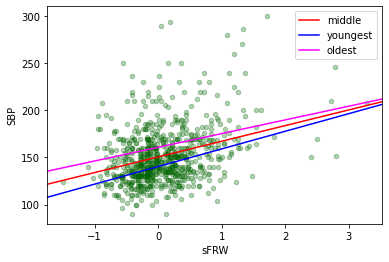

In [272]:
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP", alpha=0.3, color="darkgreen")

abline_plot(intercept=p.Intercept,
            slope=p.sFRW,
            ax=plt.gca(),
            color="red",
            label="middle")

abline_plot(intercept=p.Intercept - p["sAGE"],
            slope=p.sFRW - p["sAGE:sFRW"],
            ax=plt.gca(),
            color="blue",
            label="youngest"
            )

abline_plot(intercept=p.Intercept + p["sAGE"],
            slope=p.sFRW + p["sAGE:sFRW"],
            ax=plt.gca(),
            color="magenta",
            label="oldest")

plt.legend()

How does the dependence of blood pressure on weight change as a person gets older?
***

- The dependence seems to lower as people gets older

***

### Even more accurate model

Lets include the background variable `sCIG` from the data and its interactions. Then we visualize the model for systolic blood pressure as the function of the most important explanatory variable. We visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

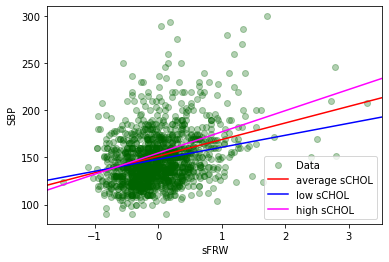

In [10]:
dependent_Y = "SBP"
independents = "sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sFRW:sCHOL + sAGE:sFRW + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE + sFRW:sCIG + SEX:sCIG + sCHOL:sCIG + sAGE:sCIG"
formula = f"{dependent_Y} ~ {independents}"
fit = smf.ols(formula, data=fram).fit()
p1 = fit.params
#print(fit.summary())

plt.scatter(fram['sFRW'], fram['SBP'], alpha=0.3, color='darkgreen', label="Data")

abline_plot(intercept=p1.Intercept,
            slope=p1.sFRW,
            ax=plt.gca(),
            color="red",
            label="average sCHOL"
)

abline_plot(intercept=p1.Intercept - p1["sCHOL"],
            slope=p1.sFRW - p1["sFRW:sCHOL"],
            ax=plt.gca(),
            color="blue",
            label="low sCHOL"
)
abline_plot(intercept=p1.Intercept + p1["sCHOL"],
            slope=p1.sFRW + p1["sFRW:sCHOL"],
            ax=plt.gca(),
            color="magenta",
            label="high sCHOL"
)
plt.xlabel("sFRW")
plt.ylabel("SBP")
plt.legend()


How does the model and its accuracy look?

***

- By looking at the plot we can see some linear relationship between the variables.

- The strongest relationships with the dependent SBP variable seems to be with pred variables weight(p-value = 0.000) and age(p-value = 0.000).

- If we take a look at the models R2 (0.152) value it looks like the accuracy is not that good.

***

# Logistic regression

In [ ]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Lets create a model `HIGH_BP ~ sFRW + SEX + SEX:sFRW`. Again we use name `fit` for the fitted model.
First lets compute and store the error rate into variable `error_rate_orig`.

In [11]:
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,
family=sm.families.Binomial()).fit()
print(fit.summary())
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
error_rate_orig

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Mon, 02 Sep 2024   Deviance:                       1713.7
Time:                        16:55:54   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06351
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

0.35581061692969873

Here we add the `sAGE` variable and its interactions. Lets check the prediction accuracy of the model and compare it to the previous model.
this time we store the prediction accuracy to variable `error_rate`.

In [13]:
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sFRW:sAGE + SEX:sAGE", data=fram,
family=sm.families.Binomial()).fit()

#print(fit.summary())
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
error_rate

0.3278335724533716

Now lets visualize the predicted probability of high blood pressure as the function of weight. We use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Lets draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men.
We use `plt.subplots` for visualization.

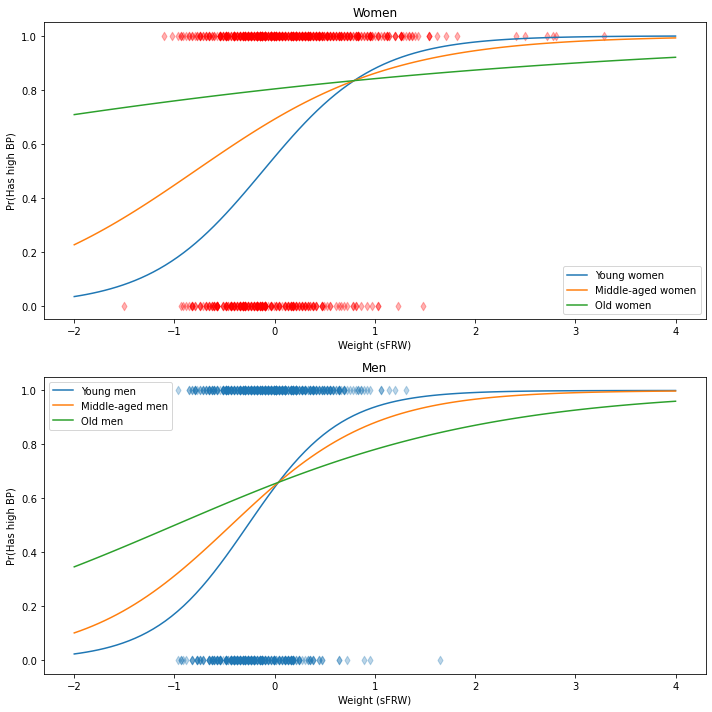

In [14]:
params = fit.params

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

age_groups = {
    "young": -1.0,
    "middle-aged": 0.0,
    "old": 1.0
}

X = np.linspace(-2, 4, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.scatter(fram[fram['SEX'] == "female"]['sFRW'], fram[fram['SEX'] == "female"]['HIGH_BP'], alpha=0.3, color="red", marker="d")

for label, age in age_groups.items():
    Y = logistic(X * params['sFRW'] + age * params['sAGE'] + X * age * params['sFRW:sAGE'] + params['Intercept'])
    ax1.plot(X, Y, label=f'{label.capitalize()} women')

ax1.set_title('Women')
ax1.set_xlabel('Weight (sFRW)')
ax1.set_ylabel('Pr(Has high BP)')
ax1.legend()

ax2.scatter(fram[fram['SEX'] == "male"]['sFRW'], fram[fram['SEX'] == "male"]['HIGH_BP'], alpha=0.3, marker="d")
for label, age in age_groups.items():
    Y = logistic(X * (params['sFRW'] + params['SEX[T.male]:sFRW']) + age * (params['sAGE'] + params['SEX[T.male]:sAGE']) + X * age * params['sFRW:sAGE'] + params['SEX[T.male]'] + params['Intercept'])
    ax2.plot(X, Y, label=f'{label.capitalize()} men')

ax2.set_title('Men')
ax2.set_xlabel('Weight (sFRW)')
ax2.set_ylabel('Pr(Has high BP)')
ax2.legend()


plt.tight_layout()
plt.show()


How do the models with different ages and genders differ from each other?

***

- The weight clearly has an impact on the risk of having high BP in both genders specifically for young and middle-aged. But as a person gets older the impact of weight gets smaller.

- The overall impact of weight is bigger on men, but for young and middle-aged women the weight impact is bigger compared to men.  

***

Here we create a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set.

In [15]:
def train_test_split(df, train_fraction=0.8):
    train_data = df.sample(frac=train_fraction)
    test_data = df.drop(train_data.index)
    return train_data, test_data

Lets check the prediction accuracy of our model using cross validation. We use 100-fold cross validation and training_fraction 0.8.

In [16]:
error_model=[]
error_null=[]
np.random.seed(1)
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sFRW:sAGE + SEX:sAGE", data=train,
    family=sm.families.Binomial(link=sm.families.links.Logit())).fit()
#print(model.summary())
    pred = fit.predict(test, transform=True)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

pd.Series(error_model).mean(), pd.Series(error_null).mean()

(0.3311827956989248, 0.3488530465949821)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, we add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, we compute the mean of this variable, which tells the number of positive cases.

In [17]:
fram["hasCHD"] = (fram["CHD"] > 0)
fram.hasCHD = fram.hasCHD.map(int)
fram.hasCHD.mean()

0.22022955523672882

Next, we form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Again we store the fitted model to variable `fit`. We also compute the prediction accuracy of the model and store it to variable `error_rate`.

In [18]:
fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data=fram,
family=sm.families.Binomial()).fit()
error_rate = 1 - np.mean(((fit.fittedvalues < 0) & fram.hasCHD) | ((fit.fittedvalues > 0) & ~fram.hasCHD))
error_rate

0.22022955523672882

Now lets visualize the model by using the most important explanator on the x axis. We visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

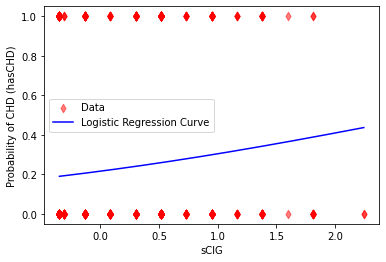

In [20]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))


x_values = np.linspace(fram["sCIG"].min(), fram["sCIG"].max(), 500)

y_values = fit.predict(pd.DataFrame({
    "sCIG": x_values,
    "sCHOL": fram["sCHOL"].mean(),
    "sFRW": fram["sFRW"].mean(),
    "sCHOL:sCIG": fram["sCHOL"].mean() * x_values,
    "sCHOL:sFRW": fram["sCHOL"].mean() * fram["sFRW"].mean(),
    "sCIG:sFRW": x_values * fram["sFRW"].mean()
}))

plt.scatter(fram["sCIG"], fram["hasCHD"], color="red", alpha=0.5, label="Data", marker="d")

plt.plot(x_values, y_values, color="blue", label="Logistic Regression Curve")


plt.xlabel("sCIG")
plt.ylabel("Probability of CHD (hasCHD)")
plt.legend()
plt.show()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***

- By looking at the Pseudo R-squared value (0.01950), we can tell that the models predictive power is bad even if the prdictors are statistically significant.
- Based on my knowledge we can not expect to have practical use of the model because of the bad accuracy.

***

Lets calculate the probability that a person sometimes shows signs of coronal heart disease when he/she has cholestherol 200, smokes 17 cigarets per day, and has weight 100. 
- The model expects normalized values.
- We store the normalized values to dictionary called `point`.
- We store the probability in variable `predicted`.

In [21]:
mean_sCHOL = fram["CHOL"].mean()
std_sCHOL = fram["CHOL"].std()

mean_sCIG = fram["CIG"].mean()
std_sCIG = fram["CIG"].std()

mean_sFRW = fram["FRW"].mean()
std_sFRW = fram["FRW"].std()


normalized_sCHOL = (200 - mean_sCHOL) / std_sCHOL
normalized_sCIG = (17 - mean_sCIG) / std_sCIG
normalized_sFRW = (99 - mean_sFRW) / std_sFRW

point = {
    "sCHOL": normalized_sCHOL,
    "sCIG": normalized_sCIG,
    "sFRW": normalized_sFRW
}


# Predict the probability using the model
predicted = fit.predict(pd.DataFrame([point])).iloc[0]